In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
font = {'family' : 'Arial',
        'size'   : 12}
matplotlib.rc('font', **font)

In [3]:
summary_aa = pd.read_csv("../../results/pairwise_distance/between_strain_opa_and_genome_distance_aa.csv", index_col = 0)

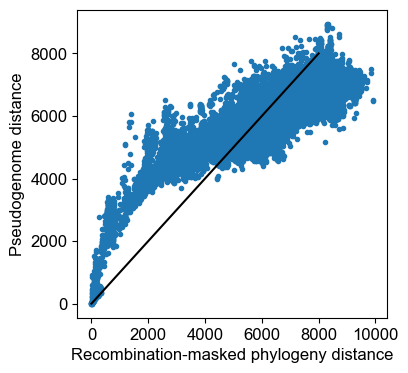

In [4]:
plt.figure(figsize = (4,4))
plt.scatter(summary_aa['genome_distance'], summary_aa['pseudogenome_distance'], marker = '.')
plt.plot([0, 8000], [0, 8000], 'k')
plt.xlabel('Recombination-masked phylogeny distance')
plt.ylabel('Pseudogenome distance')
plt.show()

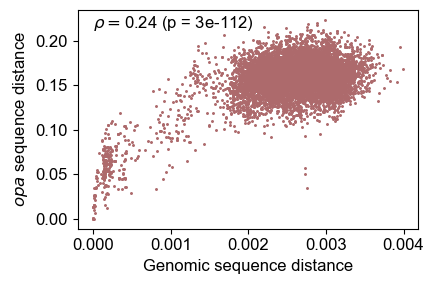

In [ ]:
genome_length = 2232025 # total pseudogenome length

# Only get the data for where both strains have the same number of opa genes
summary_aa = summary_aa[summary_aa['num_opa_difference']==0]

# Calculate spearman correlation coefficient
res = stats.spearmanr(summary_aa['pseudogenome_distance']/genome_length, summary_aa['opa_distance']/summary_aa['strain_A_num_opa'])

colors = sns.color_palette('Paired', len(np.unique(summary_aa['num_opa_difference']))).as_hex()

plt.figure(figsize = (4.5,3))
plt.scatter(summary_aa['pseudogenome_distance']/genome_length, summary_aa['opa_distance']/summary_aa['strain_A_num_opa'], marker = '.', color = '#ad6a6c', s = 5)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Genomic sequence distance')
plt.ylabel('$opa$ sequence distance')
plt.text(0, 0.215, r'$\rho=$' + str(round(res.statistic,2)) + ' (p = ' + "{:.0e}".format(res.pvalue) + ')')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.tight_layout()
plt.savefig('../../figures/diversity/opa_repertoire_aa_vs_genome_distance.png', dpi = 300)
plt.savefig('../../figures/diversity/opa_repertoire_aa_vs_genome_distance.pdf')
plt.show()

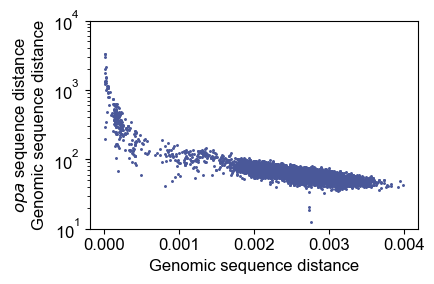

In [ ]:
genome_length = 2232025 # total pseudogenome length

# Only get the data for where both strains have the same number of opa genes
summary_aa = summary_aa[summary_aa['num_opa_difference']==0]

colors = sns.color_palette('Paired', len(np.unique(summary_aa['num_opa_difference']))).as_hex()

plt.figure(figsize = (4.5,3))
plt.scatter(summary_aa['pseudogenome_distance']/genome_length, (summary_aa['opa_distance']/summary_aa['strain_A_num_opa'])/(summary_aa['pseudogenome_distance']/genome_length), marker = '.', color = '#4a5899', s = 5)
# plt.xscale('log')
plt.ylim([10**1, 10**4])
plt.yscale('log')
plt.xlabel('Genomic sequence distance')
plt.ylabel('$opa$ sequence distance\nGenomic sequence distance')

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.tight_layout()
plt.savefig('../../figures/diversity/opa_repertoire_aa_over_genome_distance.png', dpi = 300)
plt.savefig('../../figures/diversity/opa_repertoire_aa_over_genome_distance.pdf')
plt.show()

In [12]:
ratio = (summary_aa['opa_distance']/summary_aa['strain_A_num_opa'])/(summary_aa['pseudogenome_distance']/genome_length)
print('Min ratio: ', np.min(ratio[ratio!=0]))
print('Max ratio: ', np.max(ratio[ratio!=0]))
print('Average ratio: ', np.mean(ratio[ratio!=0]))

Min ratio:  12.65984093429704
Max ratio:  3294.644872796735
Average ratio:  73.87676983996136


In [7]:
# Close opa distance but far genome distance
summary_aa[(summary_aa['opa_distance']/summary_aa['strain_A_num_opa']<0.075)&(summary_aa['pseudogenome_distance']/genome_length>2*10**-3)]

,strain_A,strain_B,opa_distance,strain_A_num_opa,strain_B_num_opa,num_opa_difference,genome_distance,pseudogenome_distance
13665,CCC028,SRR5827322,0.553009,11,11,0,5542.199638,6083.0
19162,FQ02,SRR5827322,0.624642,11,11,0,5542.121837,6105.0
22534,SRR5827322,WHO_S2_2024,0.383954,11,11,0,5621.013069,6154.0


In [8]:
# Isolates with identical opa sequences
summary_aa[summary_aa['opa_distance']==0]

,strain_A,strain_B,opa_distance,strain_A_num_opa,strain_B_num_opa,num_opa_difference,genome_distance,pseudogenome_distance
14692,DDD029,DDD034,0.0,11,11,0,7.883936,25.0
22549,SRRSH203,SRRSH229,0.0,11,11,0,0.051868,1.0
22697,SRRSH207,SRRSH240,0.0,11,11,0,0.051868,1.0
